In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [134]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [135]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.003989,-1.712795,-2.377990,-2.062139,0.241664,1
1,-0.335303,-1.986558,-2.222276,-0.735617,3.474080,0
2,0.463324,0.491665,-1.876496,-2.413809,1.115294,0
3,1.816128,1.348225,-1.688562,-0.626571,1.037501,1
4,0.916849,1.423067,-0.999046,-0.412630,0.880805,1
...,...,...,...,...,...,...
95,2.220160,1.871309,-2.761848,-0.009618,0.784531,1
96,1.065900,1.750469,0.529151,-1.686002,1.456331,1
97,-3.034641,1.314274,-1.419930,-0.767451,0.470051,0
98,-0.466010,-1.118330,-3.525634,-1.205295,2.642956,0


In [136]:
def row_sampling(df,row_ratio):
    return df.sample(int(row_ratio * df.shape[0]), replace=True)

In [137]:
def col_sampling(df,col_ratio):
    selected_cols = random.sample(df.columns.tolist()[:-1], int(col_ratio * (df.shape[1]-1)))
    new_df = df[selected_cols]
    new_df['target'] = df['target']
    return new_df

In [138]:
def combined_sampling(df,row_ratio,col_ratio):
    new_df = row_sampling(df,row_ratio)
    return col_sampling(new_df,col_ratio)

In [139]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Row Sampling

#### Tree 1

[Text(0.6, 0.8333333333333334, 'col1 <= 0.58\ngini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = 0'),
 Text(0.4, 0.5, 'col4 <= -2.11\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1')]

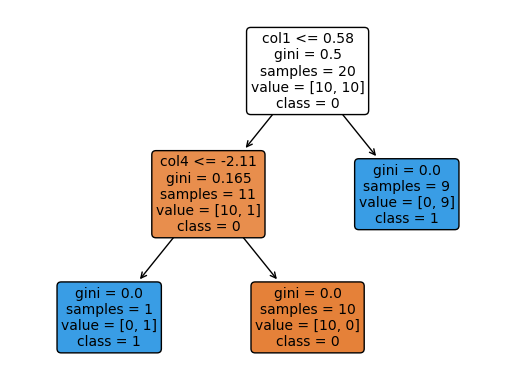

In [140]:
df_rowSample1 = row_sampling(df,0.2)
X_train1 = df_rowSample1.iloc[:,:-1]
y_train1 = df_rowSample1.iloc[:,-1]
dt1 = DecisionTreeClassifier()
dt1.fit(X_train1,y_train1)
plot_tree(
    dt1,
    feature_names=X_train1.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train1)],
    filled=True,  
    rounded=True,  
    fontsize=10    
)

#### Tree2

[Text(0.5, 0.75, 'col1 <= 0.421\ngini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = 1')]

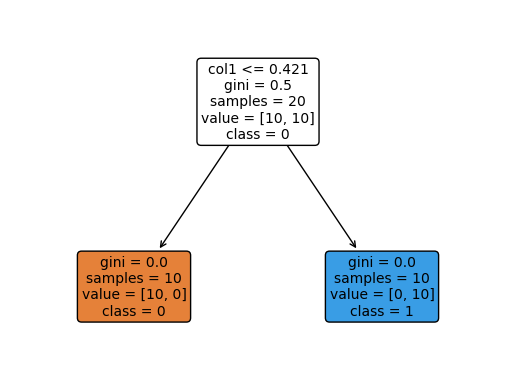

In [141]:
df_rowSample2 = row_sampling(df,0.2)
X_train2 = df_rowSample2.iloc[:,:-1]
y_train2 = df_rowSample2.iloc[:,-1]
dt2 = DecisionTreeClassifier()
dt2.fit(X_train2,y_train2)
plot_tree(
    dt2,
    feature_names=X_train2.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train2)],
    filled=True,
    rounded=True,
    fontsize=10
)

#### Tree3

[Text(0.6, 0.875, 'col1 <= 0.497\ngini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = 0'),
 Text(0.4, 0.625, 'col4 <= -0.634\ngini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = 0'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(0.6, 0.375, 'col1 <= -1.996\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 1'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = 1')]

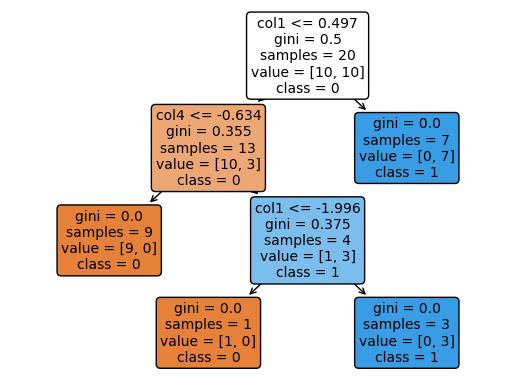

In [142]:
df_rowSample3 = row_sampling(df,0.2)
X_train3 = df_rowSample3.iloc[:,:-1]
y_train3 = df_rowSample3.iloc[:,-1]
dt3 = DecisionTreeClassifier()
dt3.fit(X_train3,y_train3)
plot_tree(
    dt3,
    feature_names=X_train3.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train3)],
    filled=True,
    rounded=True,
    fontsize=10
)

In [143]:
df

,col1,col2,col3,col4,col5,target
0,0.003989,-1.712795,-2.377990,-2.062139,0.241664,1
1,-0.335303,-1.986558,-2.222276,-0.735617,3.474080,0
2,0.463324,0.491665,-1.876496,-2.413809,1.115294,0
3,1.816128,1.348225,-1.688562,-0.626571,1.037501,1
4,0.916849,1.423067,-0.999046,-0.412630,0.880805,1
...,...,...,...,...,...,...
95,2.220160,1.871309,-2.761848,-0.009618,0.784531,1
96,1.065900,1.750469,0.529151,-1.686002,1.456331,1
97,-3.034641,1.314274,-1.419930,-0.767451,0.470051,0
98,-0.466010,-1.118330,-3.525634,-1.205295,2.642956,0


In [144]:
print(dt1.predict(np.array([-2.303873,1.323192,1.928301,-2.609204,-1.333960
                            ]).reshape(1,5)))
print(dt2.predict(np.array([-2.303873,1.323192,1.928301,-2.609204,-1.333960
                            ]).reshape(1,5)))
print(dt3.predict(np.array([-2.303873,1.323192,1.928301,-2.609204,-1.333960
                            ]).reshape(1,5)))

[1]
[0]
[0]


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [145]:
import matplotlib.pyplot as plt

# 2. Columns Sampling

#### Tree1

In [146]:
df_rowSample1 = col_sampling(df, 0.8)

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9168\2610214732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [147]:
X_train1 = df_rowSample1.iloc[:, :-1]
y_train1 = df_rowSample1.iloc[:, -1]

[Text(0.5446428571428571, 0.9285714285714286, 'col1 <= 0.567\ngini = 0.5\nsamples = 100\nvalue = [50, 50]\nclass = 0'),
 Text(0.3392857142857143, 0.7857142857142857, 'col5 <= 0.7\ngini = 0.394\nsamples = 63\nvalue = [46, 17]\nclass = 0'),
 Text(0.14285714285714285, 0.6428571428571429, 'col2 <= -0.211\ngini = 0.083\nsamples = 23\nvalue = [22, 1]\nclass = 0'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.21428571428571427, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = 0'),
 Text(0.5357142857142857, 0.6428571428571429, 'col5 <= 1.375\ngini = 0.48\nsamples = 40\nvalue = [24, 16]\nclass = 0'),
 Text(0.35714285714285715, 0.5, 'col5 <= 1.136\ngini = 0.408\nsamples = 14\nvalue = [4, 10]\nclass = 1'),
 Text(0.2857142857142857, 0.35714285714285715, 'col2 <= -0.017\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = 0'),
 Text(0.21428571428571427, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.3571428

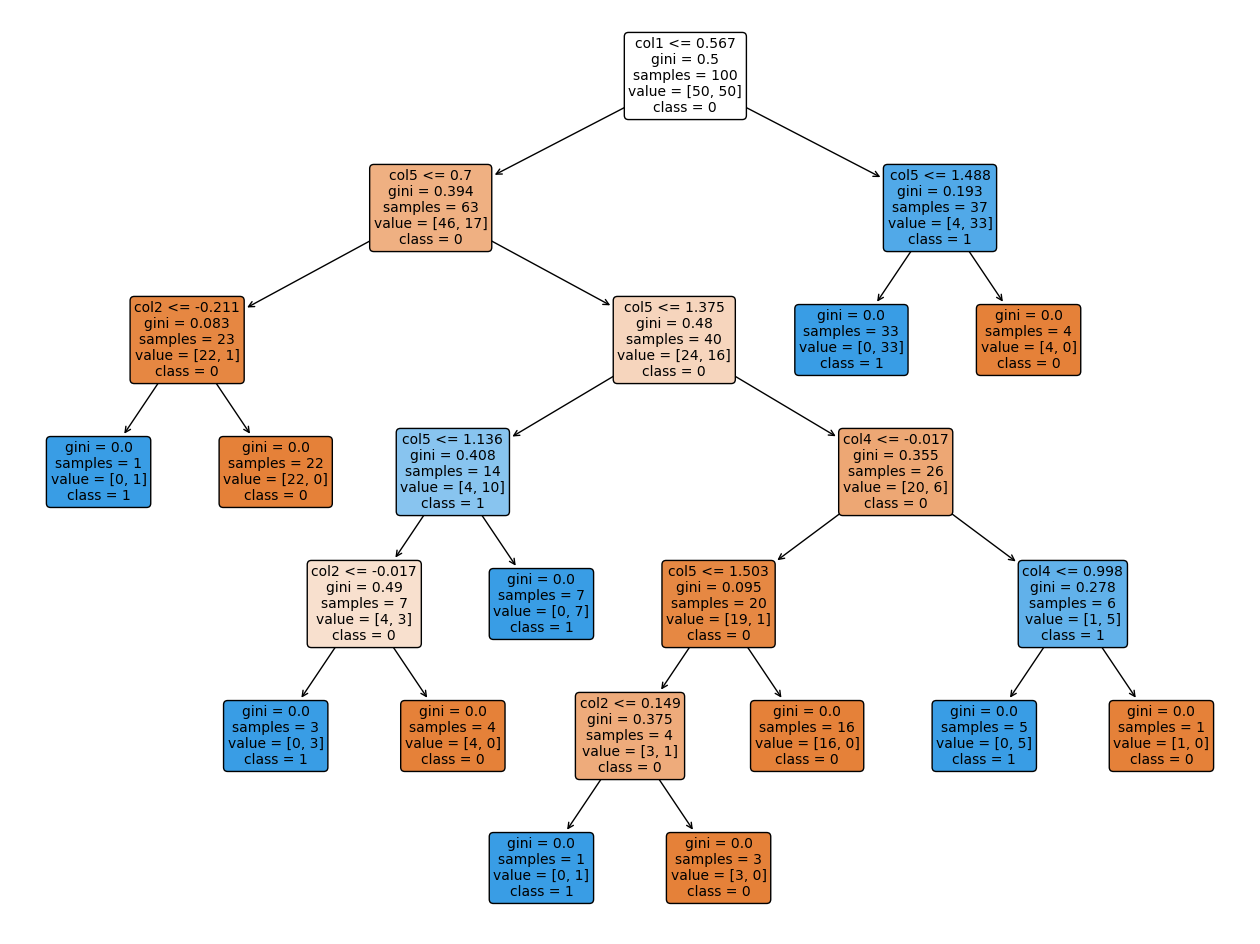

In [148]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train1, y_train1)
plt.figure(figsize=(16,12))
plot_tree(
    dt1,
    feature_names=X_train1.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train1)],
    filled=True,
    rounded=True,
    fontsize=10
)

#### Tree2

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9168\2610214732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


[Text(0.5446428571428571, 0.9285714285714286, 'col1 <= 0.567\ngini = 0.5\nsamples = 100\nvalue = [50, 50]\nclass = 0'),
 Text(0.3392857142857143, 0.7857142857142857, 'col5 <= 0.7\ngini = 0.394\nsamples = 63\nvalue = [46, 17]\nclass = 0'),
 Text(0.14285714285714285, 0.6428571428571429, 'col2 <= -0.211\ngini = 0.083\nsamples = 23\nvalue = [22, 1]\nclass = 0'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.21428571428571427, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = 0'),
 Text(0.5357142857142857, 0.6428571428571429, 'col5 <= 1.375\ngini = 0.48\nsamples = 40\nvalue = [24, 16]\nclass = 0'),
 Text(0.35714285714285715, 0.5, 'col5 <= 1.136\ngini = 0.408\nsamples = 14\nvalue = [4, 10]\nclass = 1'),
 Text(0.2857142857142857, 0.35714285714285715, 'col2 <= -0.017\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = 0'),
 Text(0.21428571428571427, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.3571428

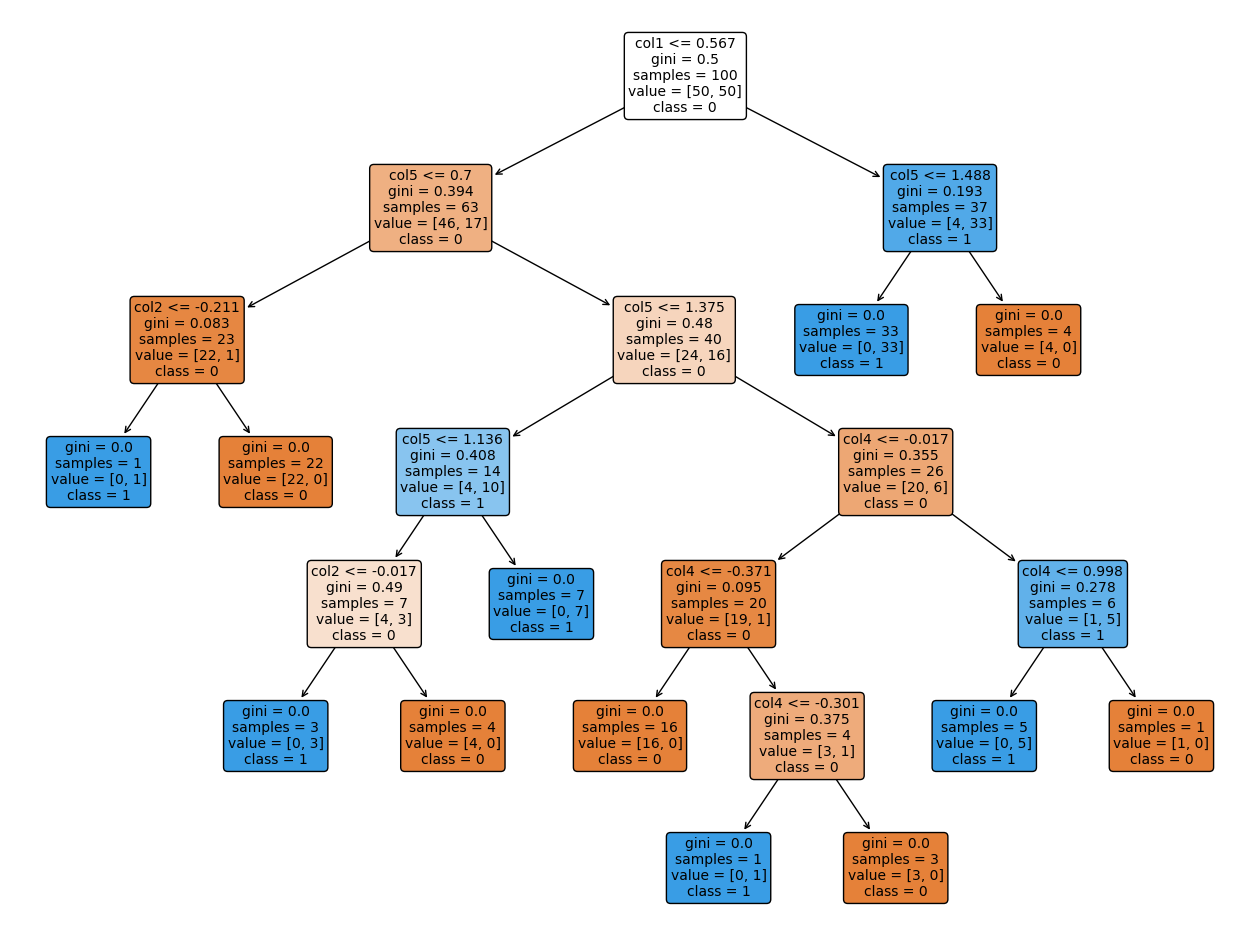

In [149]:
df_rowSample2 = col_sampling(df, 0.8)
X_train2 = df_rowSample2.iloc[:, :-1]
y_train2 = df_rowSample2.iloc[:, -1]
dt2 = DecisionTreeClassifier()
dt2.fit(X_train2, y_train2)
plt.figure(figsize=(16,12))
plot_tree(
    dt2,
    feature_names=X_train2.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train2)],
    filled=True,
    rounded=True,
    fontsize=10
)

#### Tree3

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9168\2610214732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


[Text(0.6, 0.9375, 'col1 <= 0.567\ngini = 0.5\nsamples = 100\nvalue = [50, 50]\nclass = 0'),
 Text(0.36, 0.8125, 'col3 <= -0.553\ngini = 0.394\nsamples = 63\nvalue = [46, 17]\nclass = 0'),
 Text(0.16, 0.6875, 'col4 <= -1.969\ngini = 0.139\nsamples = 40\nvalue = [37, 3]\nclass = 0'),
 Text(0.08, 0.5625, 'col4 <= -2.306\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = 0'),
 Text(0.04, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.12, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.24, 0.5625, 'col4 <= -0.371\ngini = 0.057\nsamples = 34\nvalue = [33, 1]\nclass = 0'),
 Text(0.2, 0.4375, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]\nclass = 0'),
 Text(0.28, 0.4375, 'col4 <= -0.301\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.24, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.32, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.56, 0.6875, 'col2 <= 2.273\ngini = 0.476\nsamples =

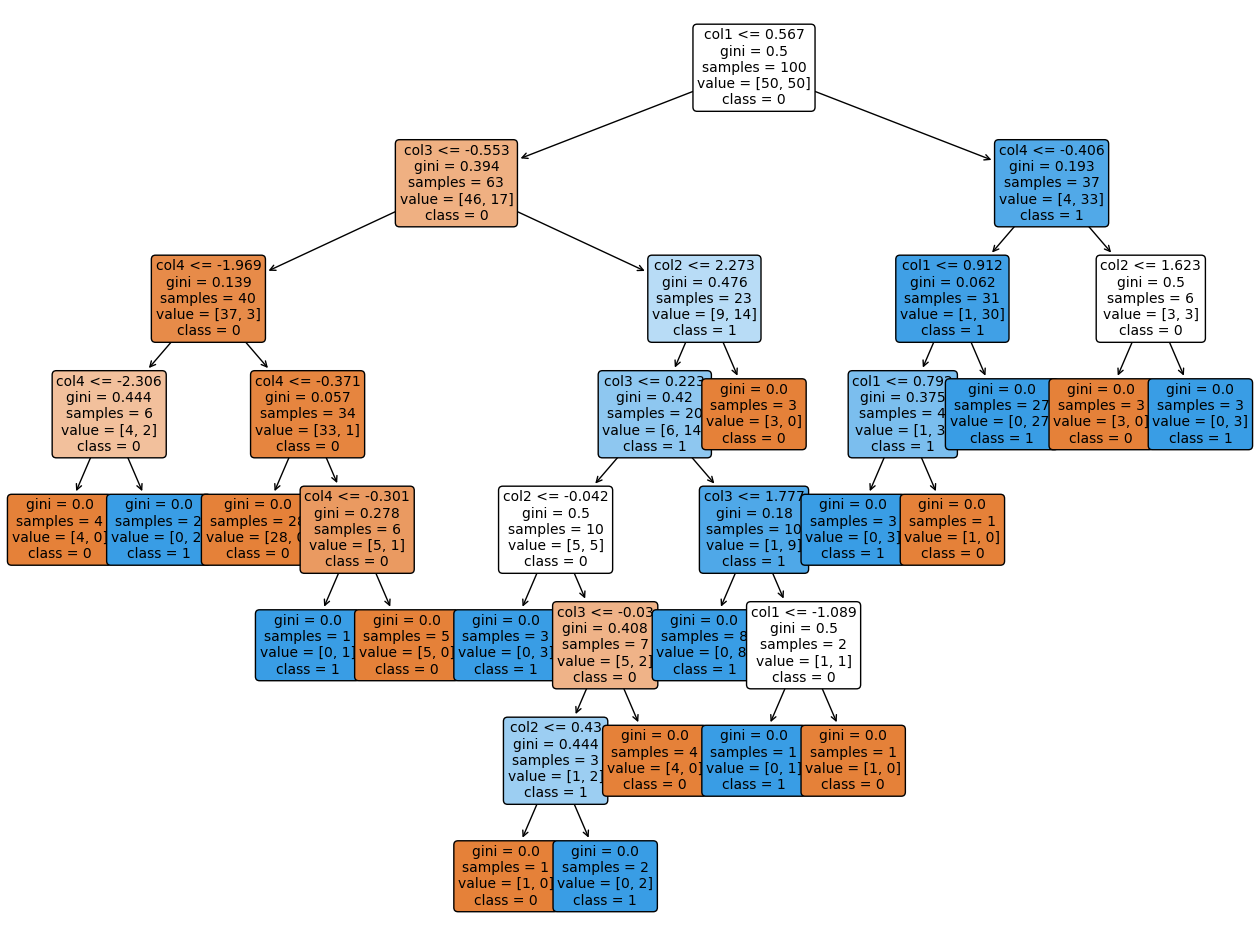

In [150]:
df_rowSample3 = col_sampling(df, 0.8)
X_train3 = df_rowSample3.iloc[:, :-1]
y_train3 = df_rowSample3.iloc[:, -1]
dt3 = DecisionTreeClassifier()
dt3.fit(X_train3, y_train3)
plt.figure(figsize=(16,12))
plot_tree(
    dt3,
    feature_names=X_train3.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train3)],
    filled=True,
    rounded=True,
    fontsize=10
)

In [151]:
df

,col1,col2,col3,col4,col5,target
0,0.003989,-1.712795,-2.377990,-2.062139,0.241664,1
1,-0.335303,-1.986558,-2.222276,-0.735617,3.474080,0
2,0.463324,0.491665,-1.876496,-2.413809,1.115294,0
3,1.816128,1.348225,-1.688562,-0.626571,1.037501,1
4,0.916849,1.423067,-0.999046,-0.412630,0.880805,1
...,...,...,...,...,...,...
95,2.220160,1.871309,-2.761848,-0.009618,0.784531,1
96,1.065900,1.750469,0.529151,-1.686002,1.456331,1
97,-3.034641,1.314274,-1.419930,-0.767451,0.470051,0
98,-0.466010,-1.118330,-3.525634,-1.205295,2.642956,0


In [155]:
print(dt1.predict(np.array([-0.128652,1.174485,-0.332092,0.308365]).reshape(1, 4)))
print(dt2.predict(np.array([-0.128652,1.174485,-0.332092,0.308365]).reshape(1, 4)))
print(dt3.predict(np.array([-0.128652,1.174485,-0.332092,0.308365]).reshape(1, 4)))

[1]
[1]
[1]


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Combined Sampling

#### tree1

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9168\2610214732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


[Text(0.358695652173913, 0.9444444444444444, 'col4 <= -1.253\ngini = 0.499\nsamples = 50\nvalue = [26, 24]\nclass = 0'),
 Text(0.17391304347826086, 0.8333333333333334, 'col3 <= -2.384\ngini = 0.391\nsamples = 15\nvalue = [4, 11]\nclass = 1'),
 Text(0.08695652173913043, 0.7222222222222222, 'col4 <= -1.551\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.043478260869565216, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.13043478260869565, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.2608695652173913, 0.7222222222222222, 'col4 <= -2.306\ngini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = 1'),
 Text(0.21739130434782608, 0.6111111111111112, 'col4 <= -2.483\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 1'),
 Text(0.17391304347826086, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.2608695652173913, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.3043478260

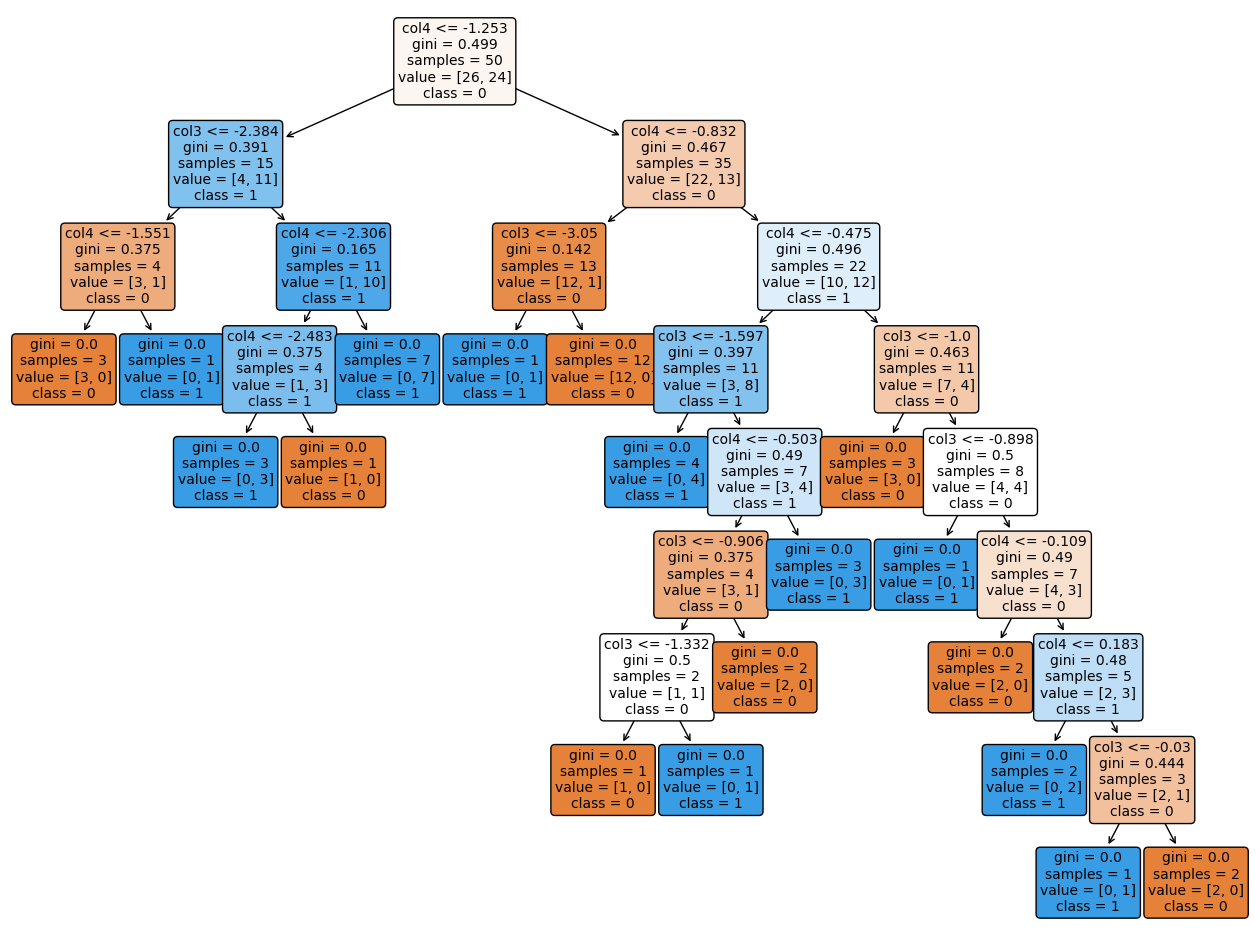

In [156]:
df_rowSample1 = combined_sampling(df, 0.5,0.5)
X_train1 = df_rowSample1.iloc[:, :-1]
y_train1 = df_rowSample1.iloc[:, -1]
dt1 = DecisionTreeClassifier()
dt1.fit(X_train1, y_train1)
plt.figure(figsize=(16, 12))
plot_tree(
    dt1,
    feature_names=X_train1.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train1)],
    filled=True,
    rounded=True,
    fontsize=10
)

#### Tree2

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9168\2610214732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


[Text(0.5, 0.9444444444444444, 'col5 <= 1.499\ngini = 0.493\nsamples = 50\nvalue = [22, 28]\nclass = 1'),
 Text(0.2, 0.8333333333333334, 'col5 <= -0.434\ngini = 0.389\nsamples = 34\nvalue = [9, 25]\nclass = 1'),
 Text(0.1, 0.7222222222222222, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.3, 0.7222222222222222, 'col2 <= 3.009\ngini = 0.278\nsamples = 30\nvalue = [5, 25]\nclass = 1'),
 Text(0.2, 0.6111111111111112, 'col2 <= 0.23\ngini = 0.238\nsamples = 29\nvalue = [4, 25]\nclass = 1'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = 1'),
 Text(0.3, 0.5, 'col2 <= 0.324\ngini = 0.346\nsamples = 18\nvalue = [4, 14]\nclass = 1'),
 Text(0.2, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.4, 0.3888888888888889, 'col5 <= 1.144\ngini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = 1'),
 Text(0.3, 0.2777777777777778, 'col2 <= 1.222\ngini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = 1'),
 Text(0.2, 0.16666666666666666, 'gin

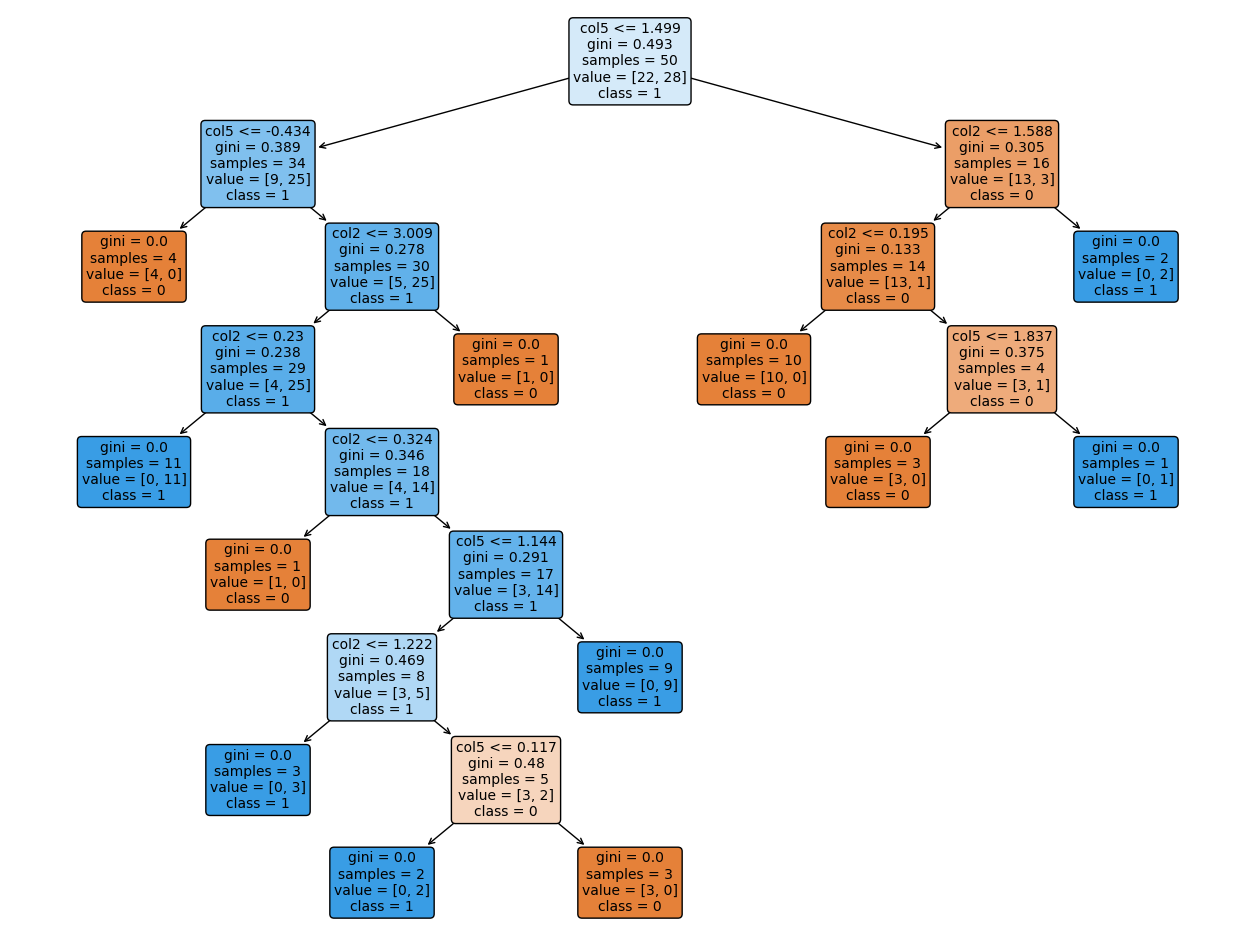

In [157]:
df_rowSample2 = combined_sampling(df, 0.5,0.5)
X_train2 = df_rowSample2.iloc[:, :-1]
y_train2 = df_rowSample2.iloc[:, -1]
dt2 = DecisionTreeClassifier()
dt2.fit(X_train2, y_train2)
plt.figure(figsize=(16, 12))
plot_tree(
    dt2,
    feature_names=X_train2.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train2)],
    filled=True,
    rounded=True,
    fontsize=10
)

#### Tree3

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9168\2610214732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


[Text(0.68125, 0.9375, 'col5 <= 1.499\ngini = 0.493\nsamples = 50\nvalue = [28, 22]\nclass = 0'),
 Text(0.4625, 0.8125, 'col2 <= 1.435\ngini = 0.482\nsamples = 32\nvalue = [13, 19]\nclass = 1'),
 Text(0.275, 0.6875, 'col5 <= 1.065\ngini = 0.363\nsamples = 21\nvalue = [5, 16]\nclass = 1'),
 Text(0.15, 0.5625, 'col2 <= 0.14\ngini = 0.153\nsamples = 12\nvalue = [1, 11]\nclass = 1'),
 Text(0.1, 0.4375, 'col2 <= -0.091\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(0.05, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.15, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.2, 0.4375, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1'),
 Text(0.4, 0.5625, 'col2 <= 0.916\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = 1'),
 Text(0.35, 0.4375, 'col5 <= 1.446\ngini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = 1'),
 Text(0.25, 0.3125, 'col2 <= 0.785\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = 1'),
 Text(0.2, 0.1875, 'gini = 

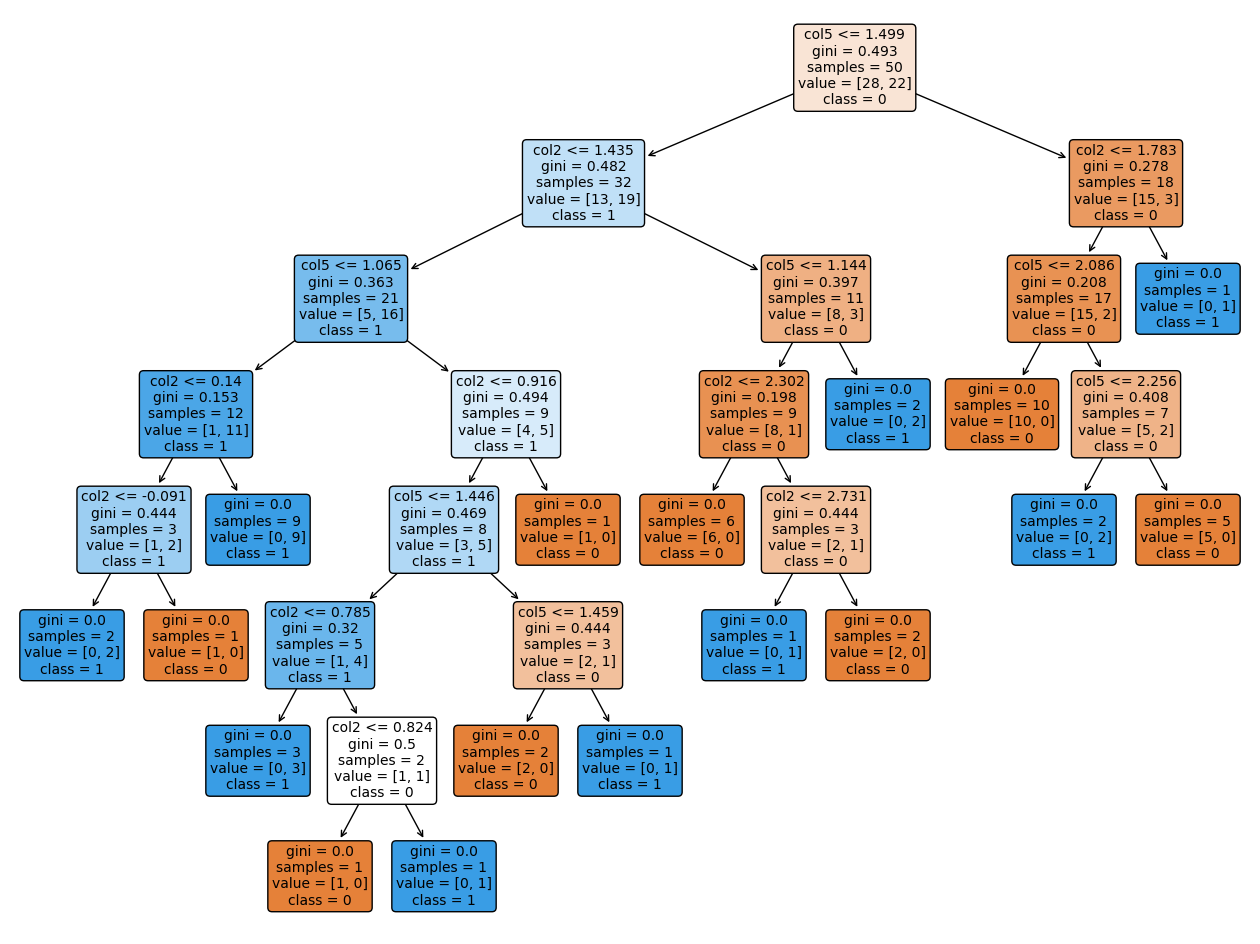

In [158]:
df_rowSample3 = combined_sampling(df, 0.5,0.5)
X_train3 = df_rowSample3.iloc[:, :-1]
y_train3 = df_rowSample3.iloc[:, -1]
dt3 = DecisionTreeClassifier()
dt3.fit(X_train3, y_train3)
plt.figure(figsize=(16, 12))
plot_tree(
    dt3,
    feature_names=X_train3.columns,
    class_names=[str(int(cls)) for cls in np.unique(y_train3)],
    filled=True,
    rounded=True,
    fontsize=10
)

In [159]:
df

,col1,col2,col3,col4,col5,target
0,0.003989,-1.712795,-2.377990,-2.062139,0.241664,1
1,-0.335303,-1.986558,-2.222276,-0.735617,3.474080,0
2,0.463324,0.491665,-1.876496,-2.413809,1.115294,0
3,1.816128,1.348225,-1.688562,-0.626571,1.037501,1
4,0.916849,1.423067,-0.999046,-0.412630,0.880805,1
...,...,...,...,...,...,...
95,2.220160,1.871309,-2.761848,-0.009618,0.784531,1
96,1.065900,1.750469,0.529151,-1.686002,1.456331,1
97,-3.034641,1.314274,-1.419930,-0.767451,0.470051,0
98,-0.466010,-1.118330,-3.525634,-1.205295,2.642956,0


In [160]:
print(dt1.predict(np.array([0.003989,-1.712795]).reshape(1, 2)))
print(dt2.predict(np.array([0.003989,-1.712795]).reshape(1, 2)))
print(dt3.predict(np.array([0.003989,-1.712795]).reshape(1, 2)))

[0]
[1]
[1]


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
